In [1]:
!pip install tensorflow transformers pandas tqdm scikit-learn

  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? et

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\ACER\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\transformers\\models\\deprecated\\trajectory_transformer\\convert_trajectory_transformer_original_pytorch_checkpoint_to_pytorch.py'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

  Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp310-cp310-win_amd64.whl (385.0 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\ACER\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
import string
import datetime
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertForSequenceClassification
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/kaggle/input/ai-vs-human-text/AI_Human.csv')

In [ ]:
print(df.head())

                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB
None


In [ ]:
df.isnull().sum()

text         0
generated    0
dtype: int64

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [ ]:
generated_counts = df['generated'].value_counts()
print("Counts of generated values:")
print(generated_counts)

Counts of generated values:
generated
0.0    305797
1.0    181438
Name: count, dtype: int64


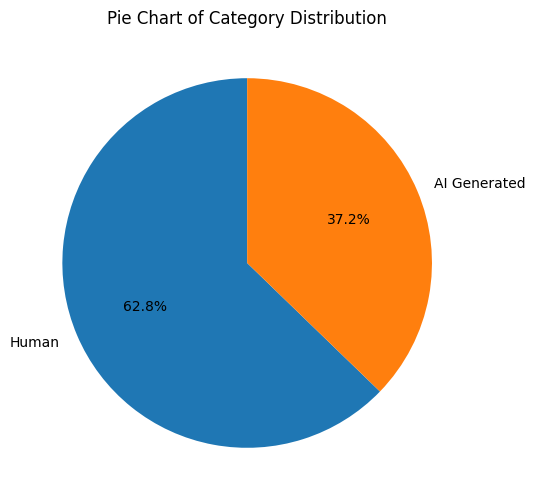

In [ ]:
value_counts = df['generated'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=['Human','AI Generated'], autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Category Distribution')
plt.show()

In [ ]:
df_0 = df[df['generated'] == 0.0]
df_1 = df[df['generated'] == 1.0]

In [ ]:
num_1 = df_1.shape[0]
print("occurences of AI text:")
print(num_1)

occurences of AI text:
181438


In [ ]:
num_0 = df_0.shape[0]
print("occurences of Human text:")
print(num_0)

occurences of Human text:
305797


In [ ]:
df_0_sampled = df_0.sample(n=num_1, random_state=42)
num_1_new = df_0_sampled.shape[0]
print("occurences of Human text After balancing the data:")
print(num_1_new)

occurences of Human text After balancing the data:
181438


In [ ]:
df_balanced = pd.concat([df_0_sampled, df_1])
num_combined = df_balanced.shape[0]
print("Number of Rows of the Balanced Dataset:")
print(num_combined)

Number of Rows of the Balanced Dataset:
362876


In [ ]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.head()

,text,generated
0,I have been burdened with the fact that our na...,0.0
1,"It is a tough position, but I would have to si...",0.0
2,"Dear Senator,\n\nI am writing to you today to ...",1.0
3,"The"" "" seems to be a very aggravating phrase f...",0.0
4,"Okay, here's my attempt at writing an essay as...",1.0


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362876 entries, 0 to 362875
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       362876 non-null  object 
 1   generated  362876 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.5+ MB


In [ ]:
print("Balanced counts of generated values:")
print(df_balanced['generated'].value_counts())

Balanced counts of generated values:
generated
0.0    181438
1.0    181438
Name: count, dtype: int64


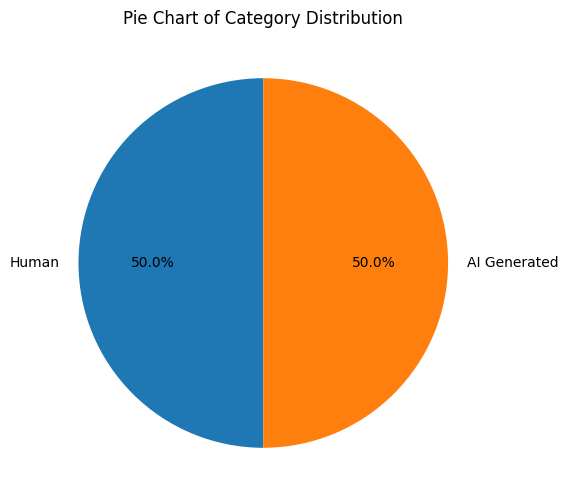

In [ ]:
value_counts = df_balanced['generated'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=['Human','AI Generated'], autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Category Distribution')
plt.show()

In [ ]:
df_balanced.to_csv('/kaggle/working/AI_Human_balanced.csv', index=False)

In [ ]:
df_balanced['text'] = df_balanced['text'].str.lower()

In [ ]:
uppercase_exists = df_balanced['text'].str.contains(r'[A-Z]').any()

if uppercase_exists:
    print("There are still uppercase letters in the 'text' column.")
else:
    print("All letters in the 'text' column are lowercase.")

All letters in the 'text' column are lowercase.


In [ ]:
punctuation_pattern = f"[{string.punctuation}]"
punctuation_exists = df_balanced['text'].str.contains(punctuation_pattern).any()
if punctuation_exists:
    print("There are punctuation marks in the 'text' column.")
else:
    print("There are no punctuation marks in the 'text' column.")

There are punctuation marks in the 'text' column.


In [ ]:
df_balanced['text'] = df_balanced['text'].str.replace(punctuation_pattern, '', regex=True)
punctuation_exists = df_balanced['text'].str.contains(punctuation_pattern).any()
if punctuation_exists:
    print("There are punctuation marks in the 'text' column.")
else:
    print("There are no punctuation marks in the 'text' column.")

There are no punctuation marks in the 'text' column.


In [ ]:
numbers_pattern = r'\d+'
numbers_exist = df_balanced['text'].str.contains(numbers_pattern, regex=True).any()

if numbers_exist:
    print("There are numbers in the 'text' column.")
else:
    print("There are no numbers in the 'text' column.")

There are no numbers in the 'text' column.


In [ ]:
df_balanced['text'] = df_balanced['text'].str.replace(numbers_pattern, '', regex=True)
numbers_exist = df_balanced['text'].str.contains(numbers_pattern, regex=True).any()

if numbers_exist:
    print("There are numbers in the 'text' column.")
else:
    print("There are no numbers in the 'text' column.")

There are no numbers in the 'text' column.


In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [ ]:
stopwords_exist = df_balanced['text'].apply(lambda x: any(word in stop_words for word in x.split())).any()
if stopwords_exist:
    print("There are stopwords in the 'text' column.")
else:
    print("There are no stopwords in the 'text' column.")

There are stopwords in the 'text' column.


In [ ]:
df_balanced['text'] = df_balanced['text'].apply(remove_stopwords)
stopwords_exist = df_balanced['text'].apply(lambda x: any(word in stop_words for word in x.split())).any()
if stopwords_exist:
    print("There are stopwords in the 'text' column.")
else:
    print("There are no stopwords in the 'text' column.")

There are no stopwords in the 'text' column.


In [ ]:
extra_spaces_exist = df_balanced['text'].str.contains(r'\s{2,}', regex=True).any()
if extra_spaces_exist:
    print("There are extra spaces in the 'text' column.")
else:
    print("There are no extra spaces in the 'text' column.")

There are no extra spaces in the 'text' column.


In [ ]:
# Creating timelog for the trainings to diffrentiate runs
log_dir = "/kaggle/working/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

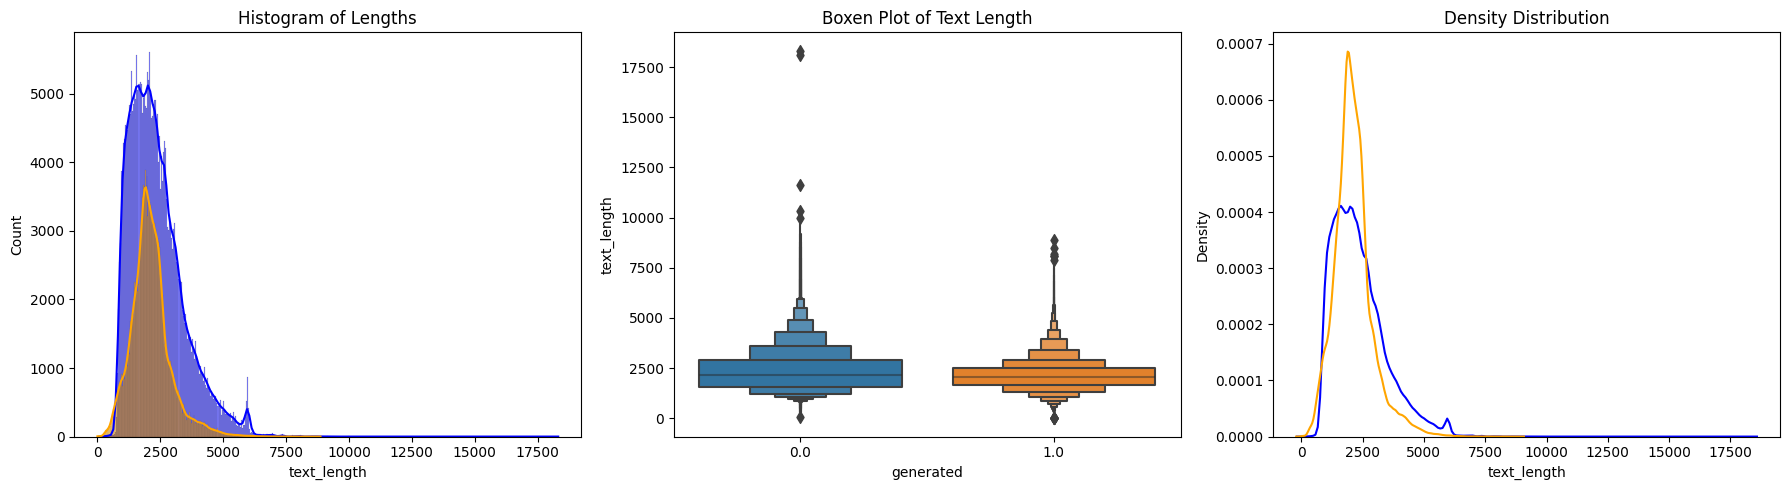

In [ ]:
df_balanced['text_length'] = df_balanced['text'].apply(len)

# Separate lengths for human and AI-generated texts
human_lengths = df_balanced[df_balanced['generated'] == 0]['text_length']
ai_lengths = df_balanced[df_balanced['generated'] == 1]['text_length']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histogram of lengths
sns.histplot(human_lengths, kde=True, color='blue', label='Human', ax=axes[0])
sns.histplot(ai_lengths, kde=True, color='orange', label='AI', ax=axes[0])
axes[0].set_title('Histogram of Lengths')
axes[0].legend()

# Boxen plot of text lengths by 'generated' category
sns.boxenplot(x='generated', y='text_length', data=df, ax=axes[1])
axes[1].set_title('Boxen Plot of Text Length')

# Density distribution of lengths
sns.kdeplot(human_lengths, color='blue', label='Human', ax=axes[2])
sns.kdeplot(ai_lengths, color='orangae', label='AI', ax=axes[2])
axes[2].set_title('Density Distribution')
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
train_df, val_df = train_test_split(df_balanced, test_size=0.1)

In [ ]:
# Initiallizing the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Function to encode texts
def encode_texts(tokenizer, texts, max_length=128):
    encoding = tokenizer(texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
    return {key: val for key, val in encoding.items()}

In [ ]:
# Function to load and preprocess dataset into small chuncks
def load_and_preprocess_data(filename, tokenizer, chunksize=32, max_length=256):
    for chunk in pd.read_csv(filename, chunksize=chunksize):
        inputs = encode_texts(tokenizer, chunk['text'].tolist(), max_length=max_length)
        targets = chunk['generated'].values
        yield inputs, {'output_1': targets}

In [ ]:
# Loaing BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Optimiser and loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=5e-5)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

In [ ]:
train_df.to_csv('/kaggle/working/train_dataset.csv', index=False)
val_df.to_csv('/kaggle/working/val_dataset.csv', index=False)

In [ ]:
# Tokenize train and val
train_gen = load_and_preprocess_data('/kaggle/working/train_dataset.csv', tokenizer)
val_gen = load_and_preprocess_data('/kaggle/working/val_dataset.csv', tokenizer)

In [ ]:
# Fiting the model with the data generator
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stopping, tensorboard_callback],
    steps_per_epoch=200,
    validation_steps=50,
    verbose=1
)

Epoch 1/10


I0000 00:00:1707208512.219789     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 [==============================] - 281s 1s/step - loss: 0.1473 - accuracy: 0.9417 - val_loss: 0.0568 - val_accuracy: 0.9831
Epoch 2/10
200/200 [==============================] - 229s 1s/step - loss: 0.0526 - accuracy: 0.9811 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 3/10
200/200 [==============================] - 230s 1s/step - loss: 0.0433 - accuracy: 0.9856 - val_loss: 0.0211 - val_accuracy: 0.9950
Epoch 4/10
200/200 [==============================] - 230s 1s/step - loss: 0.0404 - accuracy: 0.9897 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 5/10
200/200 [==============================] - 229s 1s/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0227 - val_accuracy: 0.9925
Epoch 6/10
200/200 [==============================] - 231s 1s/step - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.0226 - val_accuracy: 0.9944
Epoch 6: early stopping


In [ ]:
def predict_example(text, tokenizer, model, max_length=128):
    inputs = encode_texts(tokenizer, [text], max_length=max_length)
    predictions = model.predict(inputs)
    print(predictions.logits)
    predicted_class = np.argmax(predictions.logits, axis=1)[0]
    return "AI-generated" if predicted_class == 1 else "Human-written"